# Citation Analysis for Court Decisions

Court decisions heavily depend on citations to either other decisions or laws (literature as well, but we do not have any data not that). Thus, citations are an interesting resource for information.

In the following we demontrate how you can use the references dump for analysis.

Some ideas:
- Most used § by year, court, jurisdiction, ...
- Most cited cases
- Citation heavy jurisdictions

### Install the following dependencies:

Use your package manager to install the following dependencies (pip, pipenv, conda, ...):

```
pandas
seaborn
matplotlib
```

### Download data

First we download the data from our dump server and then decompress the file.

```
wget https://static.openlegaldata.io/dumps/de/refs/refs.csv.gz
gzip -d refs.csv.gz
```

The decompress CSV file should contain around 444k rows:

```
$ wc -l refs.csv 
444034 refs.csv
```

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil
import os

In [8]:
# Change this to your data directory
data_dir = '../../data'

## Load data

To get started we load the CSV file as pandas dataframe.

In [9]:
# All the columns
fields = 'from_case_court_chamber,from_case_court_city,from_case_court_id,from_case_court_jurisdiction,from_case_court_level_of_appeal,from_case_court_name,from_case_court_state,from_case_date,from_case_file_number,from_case_private,from_case_source_name,from_case_type,from_id,from_type,to_case_court_jurisdiction,to_case_court_level_of_appeal,to_case_court_name,to_id,to_law_book_code,to_law_section,to_law_title,to_type'.split(',')

# Define data types
dtype = {
    'from_case_court_chamber': str, 
    'from_case_court_city': str, 
    'from_case_court_id': int, 
    'from_case_court_jurisdiction': str, 
    'from_case_court_level_of_appeal': str, 
    'from_case_court_name': str, 
    'from_case_court_state': str, 
    'from_case_date': str,
    'from_case_file_number': str, 
    'from_case_private': bool, 
    'from_case_source_name': str, 
    'from_case_type': str, 
    'from_id': int,
    'from_type': str, 
    'to_case_court_jurisdiction': str, 
    'to_case_court_level_of_appeal': str, 
    'to_case_court_name': str, 
    'to_id': int, 
    'to_law_book_code': str, 
    'to_law_section': str, 
    'to_type': str
}

# Load as dataframe
df = pd.read_csv(os.path.join(data_dir, 'refs.csv'), 
                 dtype=dtype, 
                 usecols=[
                     # We do not need all the columns
                     'to_law_book_code', 
                     'to_law_section', 
                     'from_case_court_jurisdiction', 
                     'from_case_court_state'
                 ]
                )


In [10]:
# Lets have look at the data
df.head()

,from_case_court_jurisdiction,from_case_court_state,to_law_book_code,to_law_section
0,Ordentliche Gerichtsbarkeit,Bayern,BGB,§ 2
1,Ordentliche Gerichtsbarkeit,Bayern,BGB,§ 281
2,Ordentliche Gerichtsbarkeit,Bayern,BGB,§ 440
3,Ordentliche Gerichtsbarkeit,Bayern,ZPO,§ 32
4,Ordentliche Gerichtsbarkeit,Bayern,BGB,§ 826


## Visualize data

These are some example for what you could do with the data:

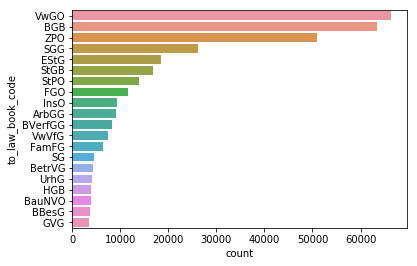

In [11]:
# What law books are cited most often?
sns.countplot(y="to_law_book_code", data=df,
              order=df['to_law_book_code'].value_counts().iloc[:20].index);


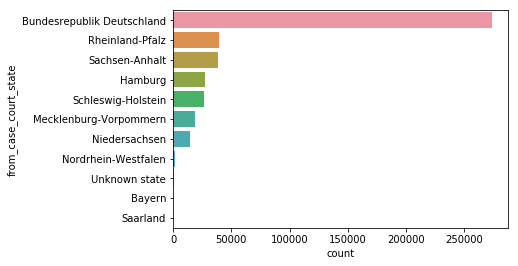

In [12]:
# Citing states
sns.countplot(y='from_case_court_state', data=df,
              order=df['from_case_court_state'].value_counts().iloc[:20].index);


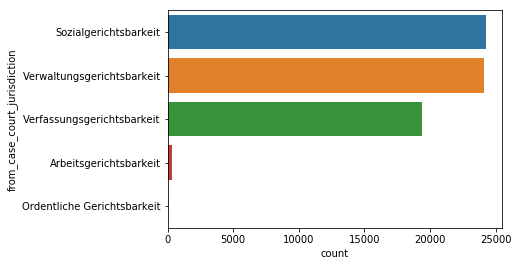

In [70]:
# Citing jurisdiction
sns.countplot(y='from_case_court_jurisdiction', data=df,
              order=df['from_case_court_jurisdiction'].value_counts().iloc[:20].index);


### Contribute

Questions? Comments? Want to tell us about the cool stuff you've built with our API? Get in touch. 

- Web: https://openlegaldata.io
- GitHub: https://github.com/openlegaldata/